In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
import pickle

In [26]:
with open('MODELS/2022-11-28_LC5_aug_split_test_0.1_full/test_data.pkl', 'rb') as f:
    test_data= pickle.load(f)
with open('MODELS/2022-11-28_LC5_aug_split_test_0.1_full/train_data.pkl', 'rb') as f:
    train_data= pickle.load(f)

In [38]:
test_data['Melt_Viscosity'].max()

12.487138375477187

In [21]:
data[[c for c in data.columns if 'fp' in c]].max()

afp_C4_C4_C4     0.444444
afp_C4_C4_H1     1.111111
afp_H1_C4_H1     0.444444
bfp_267          0.470588
bfp_282          0.444444
                   ...   
afp_H1_Si4_O2    0.000000
bfp_285          0.000000
bfp_329          0.000000
mfp_MQNs32       0.000000
mfp_MQNs34       0.000000
Length: 205, dtype: float64

In [12]:
data['ZERO_SHEAR'] = 1
data['SHEAR'] = 0
for i in data.index:
    if data.loc[i, 'Shear_Rate'] != 0:
        data.loc[i, 'SHEAR'] = 1
        data.loc[i, 'ZERO_SHEAR'] = 0
data.loc[data['Polymer'] == 'Linear HDPE', 'Polymer'] = 'polyethene'

In [13]:
#polymer_df = pd.read_excel('Polymer-SMILES.xlsx')


In [14]:
metrics = data.groupby(['Polymer', 'Sample_Type']).agg(Polymer_Count= ('Polymer', 'count'), Num_Zero_Shear = ('ZERO_SHEAR', 'sum'), Num_Shear = ('SHEAR', 'sum'), Min_Temp = ('Temperature', 'min'), Max_Temp = ('Temperature', 'max')).sort_values('Polymer_Count', ascending = False)

In [15]:
metrics.head(20)

,,Polymer_Count,Num_Zero_Shear,Num_Shear,Min_Temp,Max_Temp
Polymer,Sample_Type,,,,,
"polystyrene, polyacrylonitrile",Copolymer,121,0,121,200.000000,200.000000
polypropylene,Homopolymer,87,15,72,75.000000,260.000000
polyisobutylene,Homopolymer,77,77,0,25.000000,220.000000
"poly([2-(phenylsulfonyl)hydroquinone]-alt-{4,4'-[decane-1,10-diyldioxy]dibenzoic acid})",Homopolymer,64,4,60,130.000000,196.000000
polystyrene,Homopolymer,63,63,0,75.000000,217.000000
"poly[(butane-1,3-diol)-alt-(sebacic acid)]",Homopolymer,60,29,31,-3.295867,135.188443
poly(p-phenylene sulfide),Homopolymer,58,6,52,300.000000,300.000000
"poly(4-methyl-1-pentene), poly(1-decene)",Copolymer,56,0,56,270.000000,270.000000
polyethene,Homopolymer,52,52,0,150.000000,200.000000


In [31]:
n_points = 20
X_nums = np.arange(len(metrics.index))[:n_points]
X_poly = metrics.index[:n_points]

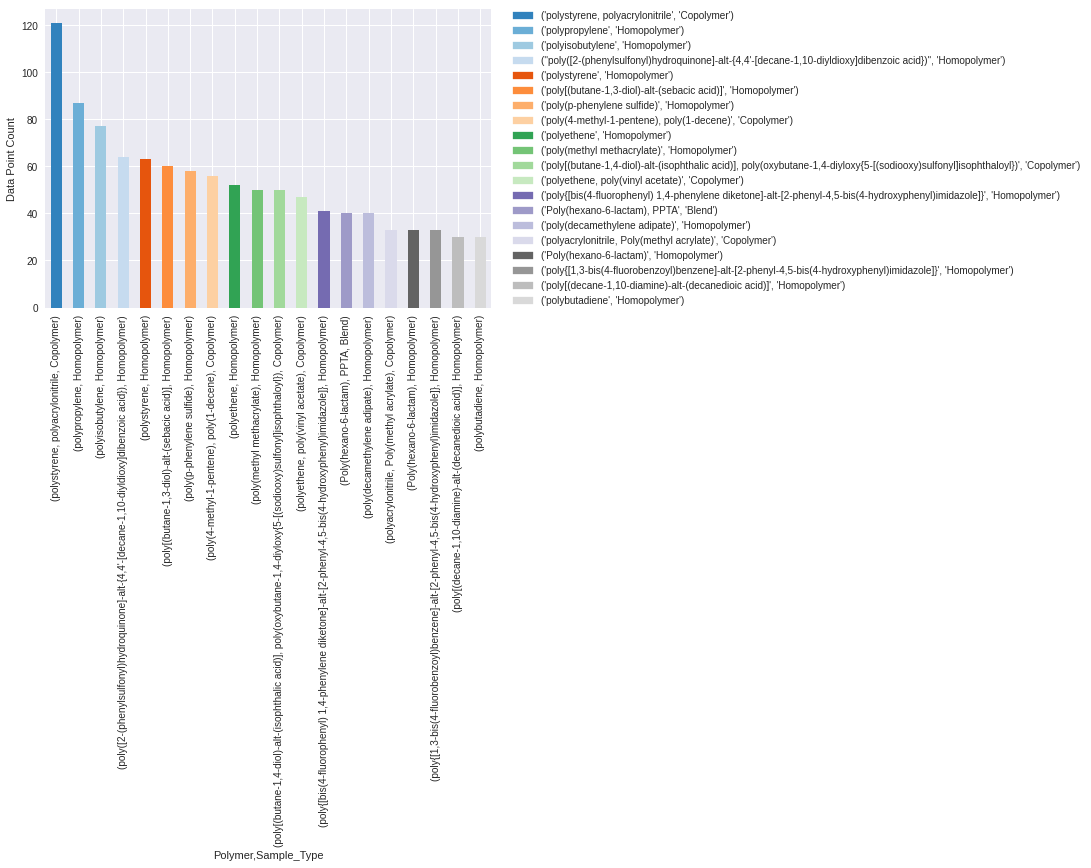

In [32]:
plt.style.use('seaborn')
colors = [plt.cm.tab20c(np.arange(len(X_poly)))]
# plot the dataframe
metrics['Polymer_Count'][:n_points].plot.bar(color=colors[0])
plt.ylabel('Data Point Count')
# create color map with colors and df.names
cmap = dict(zip(X_poly, colors[0]))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)


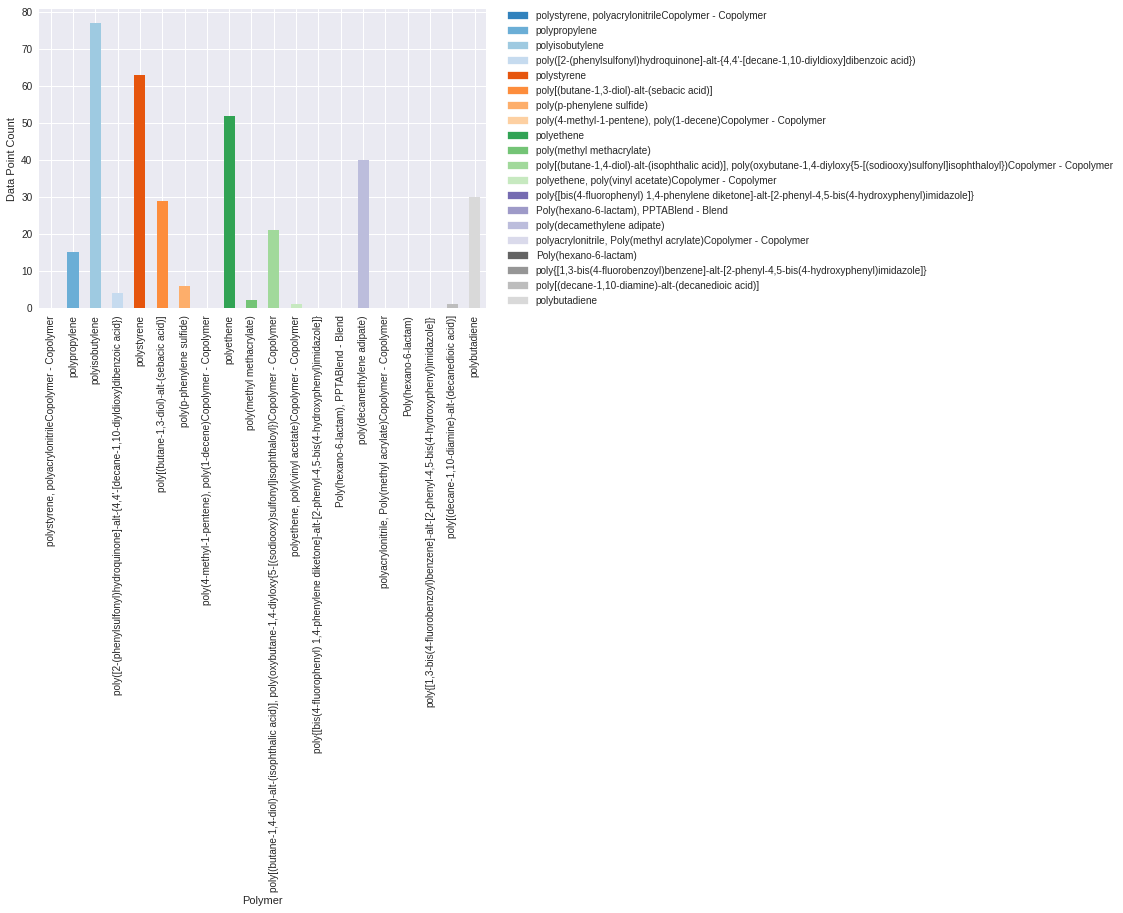

In [22]:
#plt.style.use('seaborn')
colors = plt.cm.tab20c(np.arange(len(X_poly)))

# plot the dataframe
metrics['Zero_Shear'][:n_points].plot.bar(color=colors)
plt.ylabel('Data Point Count')
# create color map with colors and df.names
cmap = dict(zip(X_poly, colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)

In [150]:
colors.shape

(40, 4)